In [1]:
from pathlib import Path
# root = Path('/home/klay6683/to_keep')
root = Path('/Users/klay6683/data/iuvs')

from iuvs import hk
hkdb = pd.read_hdf(str(root / 'HK_DB.h5'), 'df')

/Users/klay6683/miniconda3/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
%matplotlib nbagg

# focus on a continuous time interval for now

In [3]:
hkdb = hkdb.loc['2015-01-01':'2015-01-01']

<IPython.core.display.Javascript object>


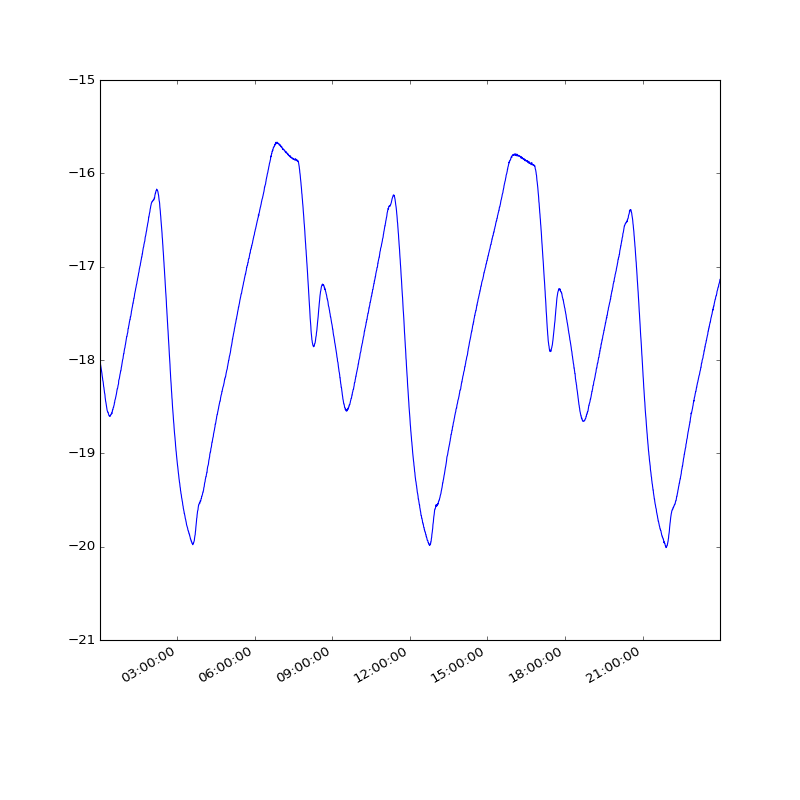

In [4]:
hkdb.FUV_DET_TEMP_C.plot()